Task 2: Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

1. Import Required Libraries


In [32]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score


2. Load Dataset

In [33]:
df=pd.read_csv("C:/Users/Shagufta Umme/Desktop/Group Customers/Mall_Customers.csv")

3. Data Quality Check

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df.shape

(200, 5)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [38]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [39]:
#Missing Values
print("Missing Values")
print(df.isnull().sum())

Missing Values
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [40]:
#Check for duplicates
print("Duplicate Rows:",df.duplicated().sum())

Duplicate Rows: 0


4. Exploratory Data Analysis (EDA)

C:\Users\Shagufta Umme\AppData\Local\Temp\ipykernel_4376\2013910577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=df,palette="PuOr")


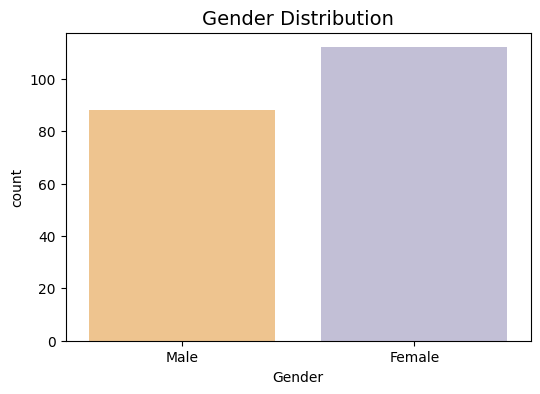

In [41]:
# Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender',data=df,palette="PuOr")
plt.title("Gender Distribution",fontsize=14)
plt.show()

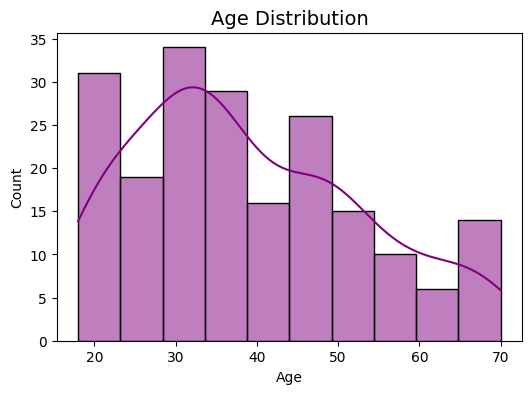

In [42]:
# Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=10, kde=True, color='purple')
plt.title("Age Distribution",fontsize=14)
plt.show()

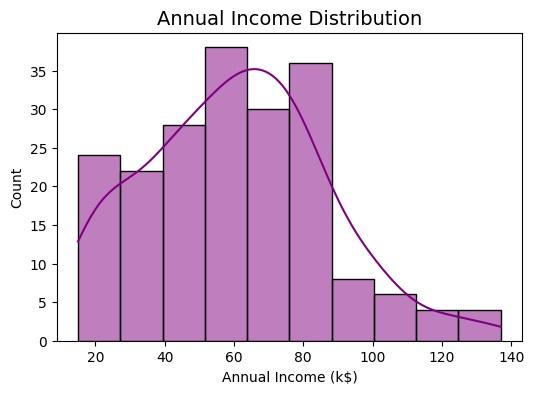

In [43]:
# Annual Income Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], bins=10, kde=True, color='purple')
plt.title("Annual Income Distribution",fontsize=14)
plt.show()

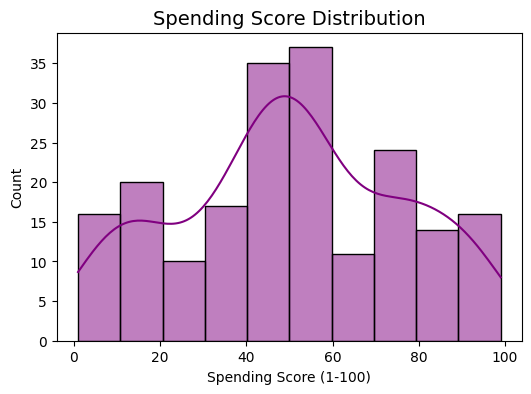

In [44]:
# Spending Score Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], bins=10, kde=True, color='purple')
plt.title("Spending Score Distribution",fontsize=14)
plt.show()

5. Feature Selection & Scaling

In [45]:
# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [46]:
 #Data Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

6. Optimal Cluster Selection

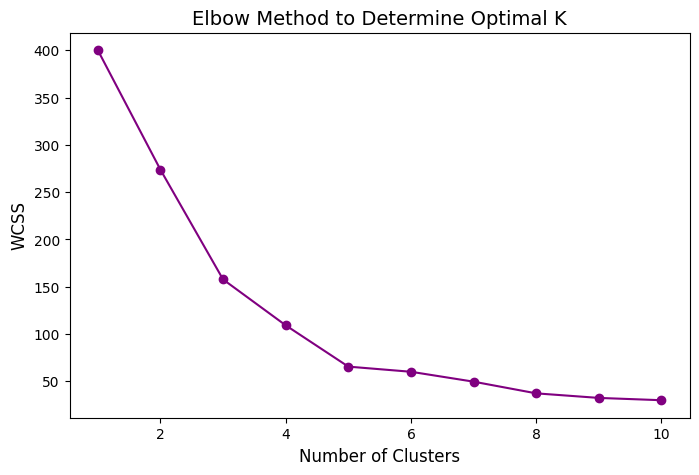

In [47]:
#Determine Optimal K using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o',color='purple')
plt.title("Elbow Method to Determine Optimal K",fontsize=14)
plt.xlabel("Number of Clusters",fontsize=12)
plt.ylabel("WCSS",fontsize=12)
plt.show()

In [48]:
print("\nSilhouette Scores for different K values (2–10):")
for k in range(2, 11):   # silhouette is not valid for k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}: Silhouette Score = {score:.3f}")


Silhouette Scores for different K values (2–10):
K=2: Silhouette Score = 0.321
K=3: Silhouette Score = 0.467
K=4: Silhouette Score = 0.494
K=5: Silhouette Score = 0.555
K=6: Silhouette Score = 0.540
K=7: Silhouette Score = 0.528
K=8: Silhouette Score = 0.455
K=9: Silhouette Score = 0.457
K=10: Silhouette Score = 0.443


7. Apply KMeans Clustering

In [49]:
#Apply K-Means Clustering
optimal_k = 5  # from elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [50]:
df['Cluster'] = clusters

8. Cluster Profiles & Summary

In [51]:
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(cluster_data[['Annual Income (k$)', 'Spending Score (1-100)']].describe().round(1))




Cluster 0:
       Annual Income (k$)  Spending Score (1-100)
count                81.0                    81.0
mean                 55.3                    49.5
std                   9.0                     6.5
min                  39.0                    34.0
25%                  48.0                    44.0
50%                  54.0                    50.0
75%                  62.0                    55.0
max                  76.0                    61.0

Cluster 1:
       Annual Income (k$)  Spending Score (1-100)
count                39.0                    39.0
mean                 86.5                    82.1
std                  16.3                     9.4
min                  69.0                    63.0
25%                  75.5                    74.5
50%                  79.0                    83.0
75%                  95.0                    90.0
max                 137.0                    97.0

Cluster 2:
       Annual Income (k$)  Spending Score (1-100)
count         

In [52]:
summary_cols=['Annual Income (k$)','Spending Score (1-100)']
summary_table=df.groupby('Cluster')[summary_cols].mean().round(2)
print("\nCluster Summary Table:\n",summary_table)



Cluster Summary Table:
          Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                     55.30                   49.52
1                     86.54                   82.13
2                     25.73                   79.36
3                     88.20                   17.11
4                     26.30                   20.91



Number of customers in each cluster:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


C:\Users\Shagufta Umme\AppData\Local\Temp\ipykernel_4376\861354491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette="PuOr")


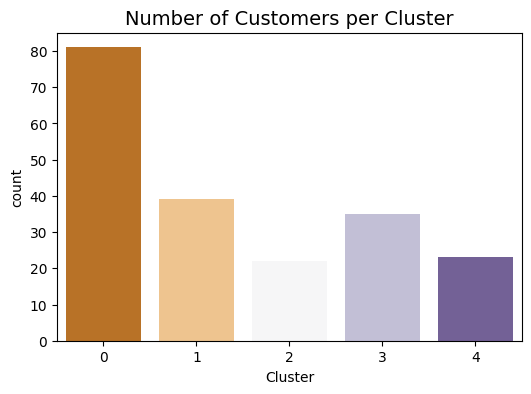

In [53]:
# Count of customers per cluster
print("\nNumber of customers in each cluster:")
print(df['Cluster'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Cluster', data=df, palette="PuOr")
plt.title("Number of Customers per Cluster",fontsize=14)
plt.show()

9. Data Visualization of Clusters

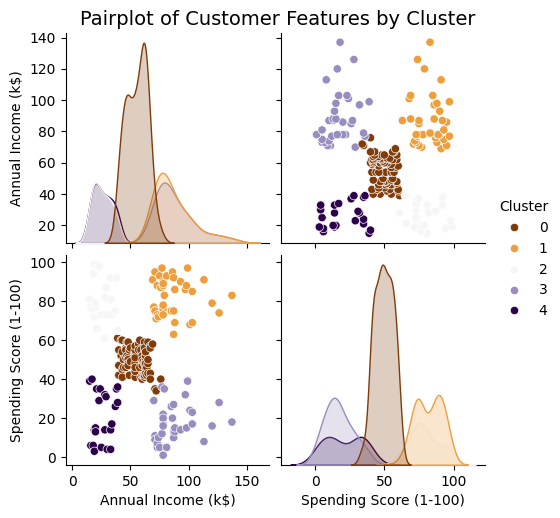

In [54]:
# Pairplot with cluster colors
sns.pairplot(df[['Annual Income (k$)','Spending Score (1-100)','Cluster']],hue='Cluster', palette="PuOr", diag_kind='kde')
plt.suptitle("Pairplot of Customer Features by Cluster", y=1.02, fontsize=14)
plt.show()

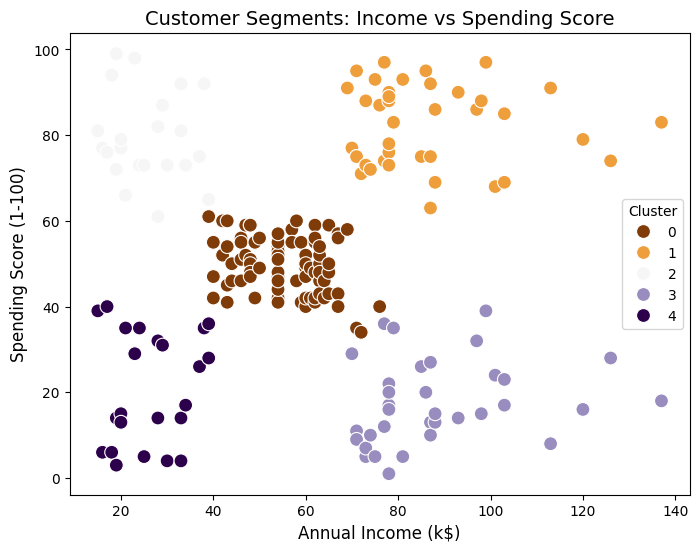

In [55]:
#Cluster Visualization-Income vs Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['Cluster'], palette="PuOr", s=100)
plt.title("Customer Segments: Income vs Spending Score",fontsize=14)
plt.xlabel("Annual Income (k$)",fontsize=12)
plt.ylabel("Spending Score (1-100)",fontsize=12)
plt.show()

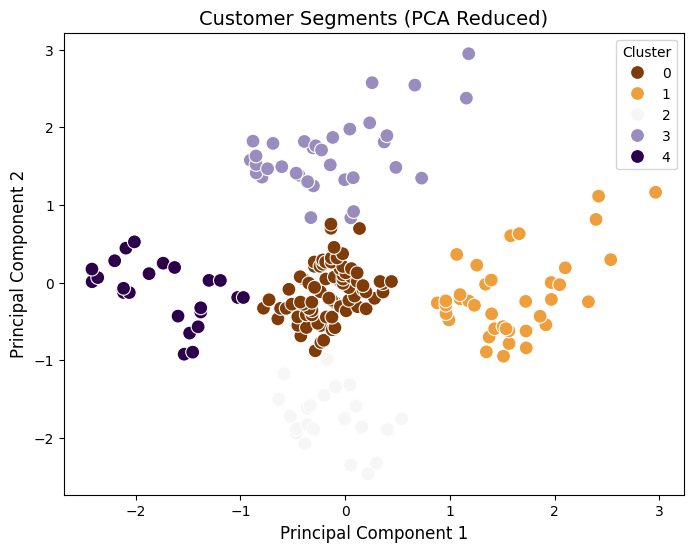

In [56]:
#PCA for 2D visualization (all features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette="PuOr", s=100)
plt.xlabel("Principal Component 1",fontsize=12)
plt.ylabel("Principal Component 2",fontsize=12)
plt.title("Customer Segments (PCA Reduced)",fontsize=14)
plt.show()

C:\Users\Shagufta Umme\AppData\Local\Temp\ipykernel_4376\2420306563.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df, palette="PuOr")


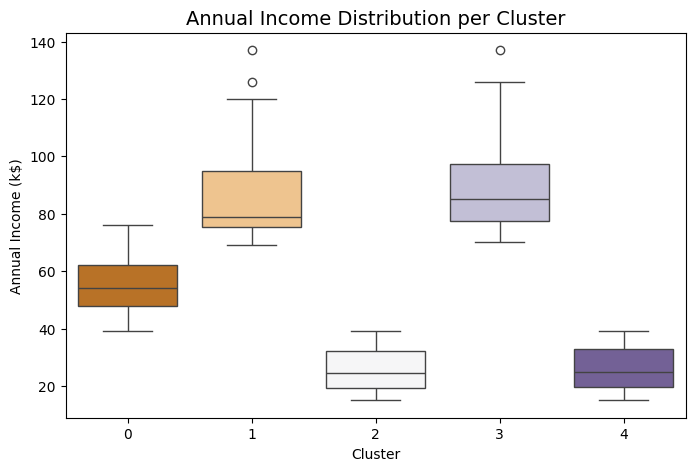

In [57]:
# Annual Income per cluster
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df, palette="PuOr")
plt.title("Annual Income Distribution per Cluster",fontsize=14)
plt.show()

C:\Users\Shagufta Umme\AppData\Local\Temp\ipykernel_4376\2515417296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette="PuOr")


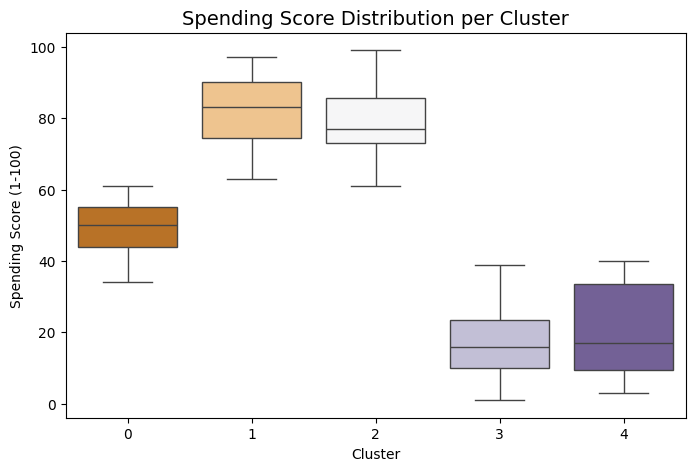

In [58]:
# Spending Score per cluster
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette="PuOr")
plt.title("Spending Score Distribution per Cluster",fontsize=14)
plt.show()

10. Cluster Evaluation Metrics

In [59]:
#Cluster Centers (Original Scale)
centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCluster Centers (Original Values):")
print(np.round(centers_original, 1))


Cluster Centers (Original Values):
[[55.3 49.5]
 [86.5 82.1]
 [25.7 79.4]
 [88.2 17.1]
 [26.3 20.9]]


In [60]:
score = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", round(score, 3))


Silhouette Score: 0.555


In [61]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, clusters))
print("Davies-Bouldin Score:", davies_bouldin_score(X_scaled, clusters))

Calinski-Harabasz Score: 248.64932001536357
Davies-Bouldin Score: 0.5722356162263352
